In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [207]:
asylum_all_data = pd.read_csv("Asylum Data/asylum_seekers_all_data.csv",low_memory=False)


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted,Applied during year,statistics.filter.decisions_recognized,statistics.filter.decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted.1
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273,150,0


In [8]:
asylum_all_data1 = asylum_all_data[asylum_all_data['Origin']=='India']

In [211]:
asylum_all_selected = asylum_all_data[['Year','Country / territory of asylum/residence','Tota pending start-year','Applied during year','Rejected'
                 ,'Otherwise closed','Total decisions','Total pending end-year']]


asylum_all_selected.head()

,Year,Country / territory of asylum/residence,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year
0,2000,Zimbabwe,0,5,0,0,5,0
1,2000,South Africa,8,0,0,0,NaN,8
2,2000,Uzbekistan,265,2156,112,327,1186,1235
3,2000,United States of America,196,225,31,68,250,171
4,2000,United States of America,193,218,51,40,273,150


In [210]:
asylum_Ind_sel = asylum_all_selected[asylum_all_selected['Year']>2007]

asylum_all_selected.head()

,Year,Country / territory of asylum/residence,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year
2035,2000,South Africa,1723,397,670,0,670,1450
2036,2000,United States of America,2027,1289,628,557,1724,1918
2037,2000,United States of America,3736,1536,684,993,2192,3080
2038,2000,Ukraine,0,8,8,0,8,0
2039,2000,Uganda,0,1,0,0,NaN,1


In [176]:
asylum_Ind_sel['Tota pending start-year'] = pd.to_numeric(asylum_Ind_sel['Tota pending start-year'], errors='coerce')

asylum_Ind_sel['Applied during year'] = pd.to_numeric(asylum_Ind_sel['Applied during year'], errors='coerce')

asylum_Ind_sel['Rejected'] = pd.to_numeric(asylum_Ind_sel['Rejected'], errors='coerce')

asylum_Ind_sel['Otherwise closed'] = pd.to_numeric(asylum_Ind_sel['Otherwise closed'], errors='coerce')

asylum_Ind_sel['Total decisions'] = pd.to_numeric(asylum_Ind_sel['Total decisions'], errors='coerce')

asylum_Ind_sel['Total pending end-year'] = pd.to_numeric(asylum_Ind_sel['Total pending end-year'], errors='coerce')


<ipython-input-176-8fad5da24ae4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asylum_Ind_sel['Tota pending start-year'] = pd.to_numeric(asylum_Ind_sel['Tota pending start-year'], errors='coerce')
<ipython-input-176-8fad5da24ae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asylum_Ind_sel['Applied during year'] = pd.to_numeric(asylum_Ind_sel['Applied during year'], errors='coerce')
<ipython-input-176-8fad5da24ae4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [180]:
asylum_Ind_sel = asylum_Ind_sel.fillna(0)

asylum_Ind_sel

,Year,Country / territory of asylum/residence,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year
52642,2008,Argentina,0.0,14.0,5.0,0.0,5.0,9.0
52643,2008,Australia,46.0,265.0,148.0,41.0,201.0,110.0
52644,2008,Australia,21.0,373.0,296.0,5.0,305.0,90.0
52645,2008,Austria,1297.0,355.0,438.0,179.0,627.0,1066.0
52646,2008,Azerbaijan,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
144934,2018,United States of America,9419.0,2633.0,1280.0,887.0,2440.0,9747.0
144935,2018,United States of America,3420.0,2563.0,77.0,224.0,537.0,4991.0
144936,2018,Yemen,0.0,0.0,0.0,0.0,0.0,0.0
144937,2018,South Africa,46.0,163.0,156.0,0.0,156.0,53.0


In [192]:
asylum_Ind_sel['Total in Year'] = asylum_Ind_sel['Tota pending start-year'] + asylum_Ind_sel['Applied during year']

asylum_Ind_sel['Total Success'] = asylum_Ind_sel['Total in Year'] - (asylum_Ind_sel['Rejected'] + asylum_Ind_sel['Otherwise closed'] )

asylum_Ind_sel['Total Rejected'] = asylum_Ind_sel['Rejected'] + asylum_Ind_sel['Otherwise closed'] 

asylum_Ind_sel

,Year,Country / territory of asylum/residence,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Total Success,Total Rejected
52642,2008,Argentina,0.0,14.0,5.0,0.0,5.0,9.0,14.0,9.0,5.0
52643,2008,Australia,46.0,265.0,148.0,41.0,201.0,110.0,311.0,122.0,189.0
52644,2008,Australia,21.0,373.0,296.0,5.0,305.0,90.0,394.0,93.0,301.0
52645,2008,Austria,1297.0,355.0,438.0,179.0,627.0,1066.0,1652.0,1035.0,617.0
52646,2008,Azerbaijan,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
144934,2018,United States of America,9419.0,2633.0,1280.0,887.0,2440.0,9747.0,12052.0,9885.0,2167.0
144935,2018,United States of America,3420.0,2563.0,77.0,224.0,537.0,4991.0,5983.0,5682.0,301.0
144936,2018,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144937,2018,South Africa,46.0,163.0,156.0,0.0,156.0,53.0,209.0,53.0,156.0


In [193]:
asylum_Ind_sel2 = asylum_Ind_sel[asylum_Ind_sel['Total in Year']>1.0]

asylum_Ind_sel2  # final dataframe 

,Year,Country / territory of asylum/residence,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Total Success,Total Rejected
52642,2008,Argentina,0.0,14.0,5.0,0.0,5.0,9.0,14.0,9.0,5.0
52643,2008,Australia,46.0,265.0,148.0,41.0,201.0,110.0,311.0,122.0,189.0
52644,2008,Australia,21.0,373.0,296.0,5.0,305.0,90.0,394.0,93.0,301.0
52645,2008,Austria,1297.0,355.0,438.0,179.0,627.0,1066.0,1652.0,1035.0,617.0
52647,2008,Belgium,0.0,84.0,40.0,3.0,43.0,0.0,84.0,41.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...
144933,2018,United States of America,10560.0,6807.0,716.0,248.0,1986.0,13751.0,17367.0,16403.0,964.0
144934,2018,United States of America,9419.0,2633.0,1280.0,887.0,2440.0,9747.0,12052.0,9885.0,2167.0
144935,2018,United States of America,3420.0,2563.0,77.0,224.0,537.0,4991.0,5983.0,5682.0,301.0
144937,2018,South Africa,46.0,163.0,156.0,0.0,156.0,53.0,209.0,53.0,156.0


In [40]:
# Checkpoint - Above is the final dataframe

In [194]:
countrywise1 = asylum_Ind_sel2.groupby(['Country / territory of asylum/residence']).sum()

countrywise1 = countrywise1.drop('Year', axis=1)

countrywise1  #country wise dataframe with total numbers

,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Total Success,Total Rejected
Country / territory of asylum/residence,,,,,,,,,
Argentina,619.0,362.0,226.0,113.0,346.0,638.0,981.0,642.0,339.0
Australia,9260.0,13491.0,7418.0,1056.0,8913.0,12087.0,22751.0,14277.0,8474.0
Austria,7437.0,4272.0,3731.0,904.0,4698.0,6406.0,11709.0,7074.0,4635.0
Azerbaijan,3.0,14.0,12.0,0.0,13.0,4.0,17.0,5.0,12.0
Belgium,178.0,1152.0,630.0,89.0,727.0,160.0,1330.0,611.0,719.0
...,...,...,...,...,...,...,...,...,...
Uganda,8.0,30.0,3.0,25.0,28.0,10.0,38.0,10.0,28.0
Ukraine,422.0,320.0,83.0,275.0,366.0,375.0,742.0,384.0,358.0
United Kingdom,5744.0,14090.0,8281.0,4092.0,12773.0,7144.0,19834.0,7461.0,12373.0


In [201]:
asylum_tol_ind = countrywise1.sort_values(by=['Total in Year'],ascending=False)[:10]

asylum_tol_ind

,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Total Success,Total Rejected
Country / territory of asylum/residence,,,,,,,,,
United States of America,67999.0,41024.0,5830.0,10453.0,22118.0,93232.0,109023.0,92740.0,16283.0
South Africa,19971.0,24206.0,13675.0,4483.0,18167.0,20410.0,44177.0,26019.0,18158.0
Germany,16175.0,15499.0,13342.0,4191.0,17819.0,17139.0,31674.0,14141.0,17533.0
Australia,9260.0,13491.0,7418.0,1056.0,8913.0,12087.0,22751.0,14277.0,8474.0
Canada,10520.0,10953.0,3226.0,1480.0,6263.0,15133.0,21473.0,16767.0,4706.0
United Kingdom,5744.0,14090.0,8281.0,4092.0,12773.0,7144.0,19834.0,7461.0,12373.0
Austria,7437.0,4272.0,3731.0,904.0,4698.0,6406.0,11709.0,7074.0,4635.0
Cyprus,2234.0,4324.0,3026.0,965.0,3994.0,2526.0,6558.0,2567.0,3991.0
Japan,2783.0,3410.0,1270.0,347.0,1620.0,3537.0,6193.0,4576.0,1617.0


ValueError: Could not interpret input 'Total Success'

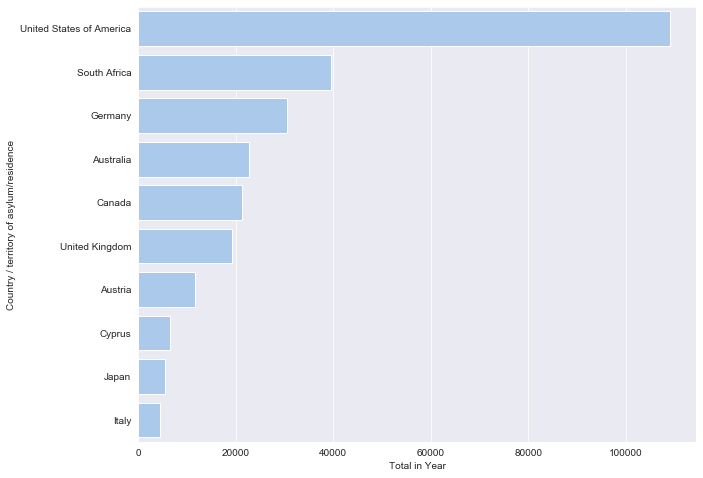

In [203]:

f, ax = plt.subplots(figsize = (10,8))
sns.set_style("darkgrid")
sns.set_color_codes('pastel')
sns.barplot(x = 'Total in Year', y = asylum_tol_ind.index, data = asylum_tol_rej,
            label = 'Total Cases', color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = 'Total Success', y = asylum_tol_ind.index, data = asylum_tol_rej,
            label = 'Total Rejected Cases', color = 'b', edgecolor = 'w')


ax.legend(ncol = 2, loc = 'lower right')
ax.set_title("India : Total Cases vs Rejected between 2008 - 2018")
ax.set_ylabel('Countries')
ax.set_xlabel('# of Cases')
sns.despine(left = True, bottom = True)
plt.show()

In [80]:
asylum_tol_rej

,Total in Year,Rejected
Country / territory of asylum/residence,,
United States of America,109023.0,5830.0
South Africa,39569.0,13757.0
Germany,30438.0,13342.0
Australia,22751.0,7418.0
Canada,21227.0,3316.0
United Kingdom,19264.0,8341.0
Austria,11631.0,3731.0
Cyprus,6529.0,3026.0
Japan,5527.0,1270.0


In [123]:
asylum_all_selected1['Success'] = asylum_all_selected1['Total decisions'] - (asylum_all_selected1['Rejected'] + asylum_all_selected1['Otherwise closed'])

In [152]:
asylum_all_selected1[asylum_all_selected1['Success']>1.0]

,Year,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Success,Succ_rate
Country / territory of asylum/residence,,,,,,,,,,
Argentina,34245,619.0,362.0,226.0,113.0,346.0,638.0,839.0,7.0,2.023121
Australia,46303,9260.0,13491.0,7418.0,1056.0,8913.0,12087.0,22751.0,439.0,4.925390
Austria,24158,7437.0,4272.0,3731.0,904.0,4698.0,6406.0,11631.0,63.0,1.340996
Belgium,52352,178.0,1153.0,635.0,93.0,736.0,160.0,1259.0,8.0,1.086957
Brazil,20134,786.0,691.0,30.0,20.0,57.0,1417.0,1477.0,7.0,12.280702
Bulgaria,28193,240.0,55.0,5.0,52.0,61.0,182.0,294.0,4.0,6.557377
Canada,30207,10520.0,10953.0,3316.0,1480.0,6355.0,15188.0,21227.0,1559.0,24.531865
"China, Hong Kong SAR",44259,1071.0,847.0,488.0,288.0,779.0,1139.0,1905.0,3.0,0.385109
Cyprus,60417,2234.0,4325.0,3026.0,965.0,3994.0,2526.0,6529.0,3.0,0.075113


In [125]:
asylum_all_selected1['Succ_rate'] = (asylum_all_selected1['Success']/asylum_all_selected1['Total decisions'])*100

In [126]:
asylum_all_selected2 = asylum_all_selected1.fillna(0)

In [206]:
asylum_all_selected2 = asylum_all_selected2[asylum_all_selected2['Success']>1].sort_values(by=['Success'],ascending=False)[:25]

asylum_all_selected2

,Year,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Success,Succ_rate
Country / territory of asylum/residence,,,,,,,,,,
United States of America,48321,67999.0,41024.0,5830.0,10453.0,22118.0,93232.0,109023.0,5835.0,26.381228
Canada,30207,10520.0,10953.0,3316.0,1480.0,6355.0,15188.0,21227.0,1559.0,24.531865
Australia,46303,9260.0,13491.0,7418.0,1056.0,8913.0,12087.0,22751.0,439.0,4.925390
Italy,22143,1772.0,2723.0,1271.0,148.0,1744.0,2747.0,4495.0,325.0,18.635321
France,64439,288.0,1539.0,951.0,40.0,1092.0,471.0,1804.0,101.0,9.249084


Text(0.5, 0, 'Countries')

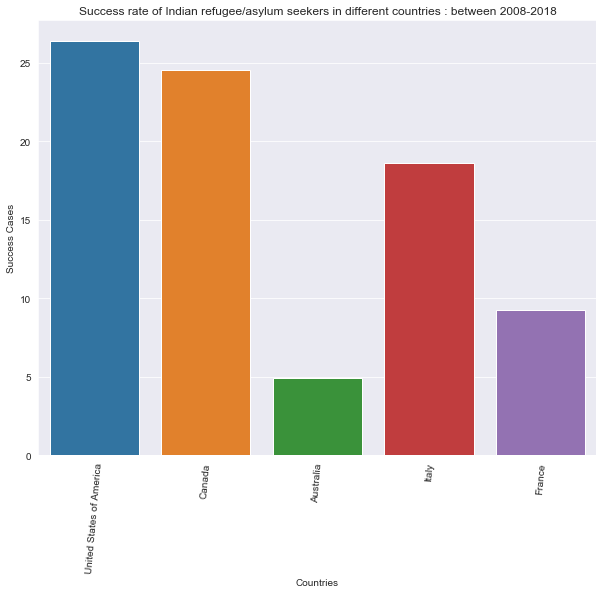

In [162]:
fig = plt.figure(figsize=(10,8))

ax = sns.barplot(x=asylum_all_selected2.index, y="Succ_rate", data=asylum_all_selected2)

ax.set_xticklabels(labels=asylum_all_selected2.index, rotation=85)
ax.set_title("Success rate of Indian refugee/asylum seekers in different countries : between 2008-2018")
ax.set_ylabel("Success Cases")
ax.set_xlabel("Countries")

In [156]:
asylum_all_selected2

,Year,Tota pending start-year,Applied during year,Rejected,Otherwise closed,Total decisions,Total pending end-year,Total in Year,Success,Succ_rate
Country / territory of asylum/residence,,,,,,,,,,
Tunisia,4023,1.0,2.0,1.0,0.0,2.0,1.0,3.0,1.0,50.000000
Costa Rica,6035,0.0,2.0,0.0,1.0,2.0,0.0,2.0,1.0,50.000000
Nauru,10080,43.0,20.0,10.0,0.0,17.0,48.0,47.0,7.0,41.176471
United States of America,48321,67999.0,41024.0,5830.0,10453.0,22118.0,93232.0,109023.0,5835.0,26.381228
Canada,30207,10520.0,10953.0,3316.0,1480.0,6355.0,15188.0,21227.0,1559.0,24.531865
Peru,20133,28.0,23.0,19.0,3.0,28.0,23.0,45.0,6.0,21.428571
Russian Federation,26186,5.0,28.0,10.0,13.0,29.0,5.0,26.0,6.0,20.689655
Pakistan,12072,7.0,3.0,1.0,3.0,5.0,5.0,10.0,1.0,20.000000
Italy,22143,1772.0,2723.0,1271.0,148.0,1744.0,2747.0,4495.0,325.0,18.635321
